In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import requests

In [7]:
url = 'https://api.covidtracking.com/v1/states/daily.json'
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
else:
    print("Error al obtener los datos.")

In [8]:
# Visualizar las primeras filas del DataFrame
print(df.head())

# Obtener información sobre el DataFrame
print(df.info())

# Resumen estadístico de los datos
print(df.describe())


       date state  positive  probableCases   negative  pending  \
0  20210307    AK   56886.0            NaN        NaN      NaN   
1  20210307    AL  499819.0       107742.0  1931711.0      NaN   
2  20210307    AR  324818.0        69092.0  2480716.0      NaN   
3  20210307    AS       0.0            NaN     2140.0      NaN   
4  20210307    AZ  826454.0        56519.0  3073010.0      NaN   

  totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
0        totalTestsViral         1731628.0                   33.0   
1  totalTestsPeopleViral         2323788.0                  494.0   
2        totalTestsViral         2736442.0                  335.0   
3        totalTestsViral            2140.0                    NaN   
4        totalTestsViral         7908105.0                  963.0   

   hospitalizedCumulative  ...  dataQualityGrade  deathIncrease  \
0                  1293.0  ...              None              0   
1                 45976.0  ...              None      

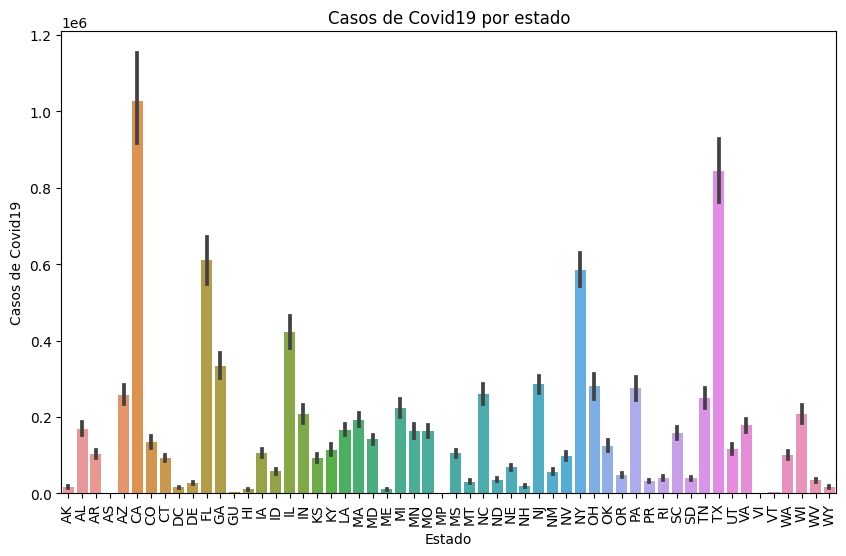

In [10]:
# Ejemplo de gráfico de barras con Matplotlib y Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='positive', data=df)
plt.xlabel('Estado')
plt.ylabel('Casos de Covid19')
plt.title('Casos de Covid19 por estado')
plt.xticks(rotation=90)
plt.show()


In [31]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource

output_notebook()

# Eliminar filas duplicadas en función de la columna 'state'
df_unique_states = df.drop_duplicates(subset=['state'])

# Crear una fuente de datos para Bokeh
source = ColumnDataSource(df_unique_states)

# Ejemplo de gráfico interactivo con Bokeh
p = figure(x_range=df_unique_states['state'], width=800, height=400, title='Casos de Covid19 por estado')
p.vbar(x='state', top='positive', width=0.9, source=source, line_color='white', fill_color='blue')
p.xaxis.major_label_orientation = 1.2

show(p)



Loading BokehJS ...